# Diane Rodden
## BIOS 512
## Final Project
## "Patterns in Data Science Salaries by State"
### Jupyter Notework with R code

In [328]:
library('tidyverse')
library('tidyr')
library('dplyr')
library('openintro')
library('RColorBrewer')
library('ggplot2')
library('patchwork')
library('ggrepel')

In [329]:
options(repr.plot.width = 9, repr.plot.height = 4)

In [330]:
# set option so that data will be imported without factors
options('stringsAsFactors'=FALSE)

In [331]:
# read in the Data Science salaries file
ds_sal = read.csv("https://raw.githubusercontent.com/GitHubUNCStudent/BIOS512-assignments/master/FinalProject/headers%20zip%20recruiter.csv", header=TRUE)
head(ds_sal)

ï..State,Hourly.Wage,Annual.Salary
<chr>,<dbl>,<int>
New York - Data Scientist Salary,62.25,129478
Massachusetts - Data Scientist Salary,61.75,128450
New Hampshire - Data Scientist Salary,60.54,125932
Maryland - Data Scientist Salary,57.63,119868
Vermont - Data Scientist Salary,57.03,118625
Hawaii - Data Scientist Salary,57.00,118565


In [332]:
# rename columns
ds_sal = rename(ds_sal, DSSalary = Annual.Salary, DSHourly = Hourly.Wage)
names(ds_sal)[1] = "State"
head(ds_sal)
names(ds_sal)


State,DSHourly,DSSalary
<chr>,<dbl>,<int>
New York - Data Scientist Salary,62.25,129478
Massachusetts - Data Scientist Salary,61.75,128450
New Hampshire - Data Scientist Salary,60.54,125932
Maryland - Data Scientist Salary,57.63,119868
Vermont - Data Scientist Salary,57.03,118625
Hawaii - Data Scientist Salary,57.00,118565


[1] "State"    "DSHourly" "DSSalary"

In [333]:
# make a new df to work with
ds_sal2 = ds_sal
head(ds_sal2)

State,DSHourly,DSSalary
<chr>,<dbl>,<int>
New York - Data Scientist Salary,62.25,129478
Massachusetts - Data Scientist Salary,61.75,128450
New Hampshire - Data Scientist Salary,60.54,125932
Maryland - Data Scientist Salary,57.63,119868
Vermont - Data Scientist Salary,57.03,118625
Hawaii - Data Scientist Salary,57.00,118565


In [334]:
# remove all - Data Scientist Salary text in state
ds_sal2 = mutate(ds_sal2, StateName=str_replace(ds_sal$State, " - Data Scientist Salary", ""))
ds_sal2 = select(ds_sal2, -c(State))
head(ds_sal2)

DSHourly,DSSalary,StateName
<dbl>,<int>,<chr>
62.25,129478,New York
61.75,128450,Massachusetts
60.54,125932,New Hampshire
57.63,119868,Maryland
57.03,118625,Vermont
57.00,118565,Hawaii


In [335]:
# make a copy of the df to work with
ds_sal3 = ds_sal2
head(ds_sal3)

DSHourly,DSSalary,StateName
<dbl>,<int>,<chr>
62.25,129478,New York
61.75,128450,Massachusetts
60.54,125932,New Hampshire
57.63,119868,Maryland
57.03,118625,Vermont
57.00,118565,Hawaii


In [336]:
# get state abbreviations with open intro library
ds_sal3 = mutate(ds_sal3, StateAbbr=state2abbr(ds_sal3$StateName))
head(ds_sal3)

DSHourly,DSSalary,StateName,StateAbbr
<dbl>,<int>,<chr>,<chr>
62.25,129478,New York,NY
61.75,128450,Massachusetts,MA
60.54,125932,New Hampshire,NH
57.63,119868,Maryland,MD
57.03,118625,Vermont,VT
57.00,118565,Hawaii,HI


In [337]:
# make a copy of the df to work with
ds_sal4 = ds_sal3
head(ds_sal4)

DSHourly,DSSalary,StateName,StateAbbr
<dbl>,<int>,<chr>,<chr>
62.25,129478,New York,NY
61.75,128450,Massachusetts,MA
60.54,125932,New Hampshire,NH
57.63,119868,Maryland,MD
57.03,118625,Vermont,VT
57.00,118565,Hawaii,HI


In [338]:
# read in the file of data science job counts by state
ds_jobcount = read.csv("https://raw.githubusercontent.com/GitHubUNCStudent/BIOS512-assignments/master/FinalProject/headers%20blog%20job%20counts.csv",
                       header=TRUE)
head(ds_jobcount)

ï..ST,JOB.COUNT
<chr>,<int>
CA,38
NY,12
MA,8
IL,6
PA,5
TX,5


In [339]:
# make a copy of the df to work with
ds_jobcount2 = ds_jobcount
head(ds_jobcount2)

ï..ST,JOB.COUNT
<chr>,<int>
CA,38
NY,12
MA,8
IL,6
PA,5
TX,5


In [340]:
# rename columns
ds_jobcount2 = rename(ds_jobcount2, DSJobCount = JOB.COUNT)

head(ds_jobcount2)

ï..ST,DSJobCount
<chr>,<int>
CA,38
NY,12
MA,8
IL,6
PA,5
TX,5


In [341]:
# make a copy of the df to work with
ds_jobcount3 = ds_jobcount2
head(ds_jobcount3)

ï..ST,DSJobCount
<chr>,<int>
CA,38
NY,12
MA,8
IL,6
PA,5
TX,5


In [342]:
# rename the state abbreviation column
names(ds_jobcount3)[1] = "StateAbbreviation"
head(ds_jobcount3)

StateAbbreviation,DSJobCount
<chr>,<int>
CA,38
NY,12
MA,8
IL,6
PA,5
TX,5


In [343]:
# make a copy of the df to work with
ds_jobcount4 = ds_jobcount3
head(ds_jobcount4)

StateAbbreviation,DSJobCount
<chr>,<int>
CA,38
NY,12
MA,8
IL,6
PA,5
TX,5


In [344]:
# remove rows for District of Columbia and Puerto Rico if in file
# subset the rows using dplyr
ds_jobcount5 = filter(ds_jobcount4, !StateAbbreviation %in% c('DC', 'PR'))
ds_jobcount5

StateAbbreviation,DSJobCount
<chr>,<int>
CA,38
NY,12
MA,8
IL,6
PA,5
TX,5
GA,3
WA,3
CO,2


In [345]:
# make a copy of the df to work with
ds_jobcount6 = ds_jobcount5

In [346]:
# read in the RPP file
rpp = read.csv("https://raw.githubusercontent.com/GitHubUNCStudent/BIOS512-assignments/master/FinalProject/headers%20RPP%20download%20summary%20only.csv", 
               header=TRUE)
head(rpp)

GeoName,X2017.RPP
<chr>,<dbl>
United States,100.0
Alabama,86.7
Alaska,104.4
Arizona,96.4
Arkansas,86.5
California,114.8


In [347]:
# make a copy of the df to work with
rpp2 = rpp
head(rpp2)

GeoName,X2017.RPP
<chr>,<dbl>
United States,100.0
Alabama,86.7
Alaska,104.4
Arizona,96.4
Arkansas,86.5
California,114.8


In [348]:
# rename columns
rpp2 = rename(rpp2, RPP2017 = X2017.RPP)
head(rpp2)

GeoName,RPP2017
<chr>,<dbl>
United States,100.0
Alabama,86.7
Alaska,104.4
Arizona,96.4
Arkansas,86.5
California,114.8


In [349]:
# make a copy of the df to work with
rpp3 = rpp2
head(rpp3)

GeoName,RPP2017
<chr>,<dbl>
United States,100.0
Alabama,86.7
Alaska,104.4
Arizona,96.4
Arkansas,86.5
California,114.8


In [350]:
# remove rows for District of Columbia and United States
# subset the rows using dplyr
rpp4 = filter(rpp3, !GeoName %in% c('District of Columbia', 'United States'))
rpp4

GeoName,RPP2017
<chr>,<dbl>
Alabama,86.7
Alaska,104.4
Arizona,96.4
Arkansas,86.5
California,114.8
Colorado,103.2
Connecticut,108.0
Delaware,100.1
Florida,99.9


In [351]:
# make a copy of the df to work with
rpp5 = rpp4
head(rpp5)

GeoName,RPP2017
<chr>,<dbl>
Alabama,86.7
Alaska,104.4
Arizona,96.4
Arkansas,86.5
California,114.8
Colorado,103.2


In [352]:
# read in the median household income
HH_Inc = read.csv("https://raw.githubusercontent.com/GitHubUNCStudent/BIOS512-assignments/master/FinalProject/headers%20ACS_17_1YR_R1901.US01PRF_with_ann.csv", 
               header=TRUE)
head(HH_Inc)

Id,Target.Geo.Id,Target.Geo.Id2,Rank,Geographical.Area,EST.MEDIAN.HOUSEHOLD.INCOME.Dollar,Margin.of.Error
<chr>,<chr>,<int>,<int>,<chr>,<int>,<int>
0100000US,0100000US,NA,NA,United States,60336,86
0100000US,0400000US11,11,1,District of Columbia,82372,2651
0100000US,0400000US24,24,2,Maryland,80776,707
0100000US,0400000US34,34,3,New Jersey,80088,672
0100000US,0400000US15,15,4,Hawaii,77765,1795
0100000US,0400000US25,25,5,Massachusetts,77385,907


In [353]:
# make a copy of the df to work with
HH_Inc2 = HH_Inc
head(HH_Inc2)

Id,Target.Geo.Id,Target.Geo.Id2,Rank,Geographical.Area,EST.MEDIAN.HOUSEHOLD.INCOME.Dollar,Margin.of.Error
<chr>,<chr>,<int>,<int>,<chr>,<int>,<int>
0100000US,0100000US,NA,NA,United States,60336,86
0100000US,0400000US11,11,1,District of Columbia,82372,2651
0100000US,0400000US24,24,2,Maryland,80776,707
0100000US,0400000US34,34,3,New Jersey,80088,672
0100000US,0400000US15,15,4,Hawaii,77765,1795
0100000US,0400000US25,25,5,Massachusetts,77385,907


In [354]:
# remove rows for District of Columbia, United States and Puerto Rico
# subset the rows using dplyr
HH_Inc3 = filter(HH_Inc2, !Geographical.Area %in% c('District of Columbia', 'United States', 'Puerto Rico'))
HH_Inc3

Id,Target.Geo.Id,Target.Geo.Id2,Rank,Geographical.Area,EST.MEDIAN.HOUSEHOLD.INCOME.Dollar,Margin.of.Error
<chr>,<chr>,<int>,<int>,<chr>,<int>,<int>
0100000US,0400000US24,24,2,Maryland,80776,707
0100000US,0400000US34,34,3,New Jersey,80088,672
0100000US,0400000US15,15,4,Hawaii,77765,1795
0100000US,0400000US25,25,5,Massachusetts,77385,907
0100000US,0400000US09,9,6,Connecticut,74168,1345
0100000US,0400000US33,33,7,New Hampshire,73381,1694
0100000US,0400000US02,2,8,Alaska,73181,2628
0100000US,0400000US06,6,9,California,71805,294
0100000US,0400000US51,51,10,Virginia,71535,544


In [355]:
# make a copy of the df to work with
HH_Inc4 = HH_Inc3

In [356]:
# fix the rank now that District of Columbia is removed
# note that United States and Puerto Rico had no rank assigned (were blank)
HH_Inc4 = mutate(HH_Inc4, MHINewRank = HH_Inc4$Rank - 1)
head(HH_Inc4)

Id,Target.Geo.Id,Target.Geo.Id2,Rank,Geographical.Area,EST.MEDIAN.HOUSEHOLD.INCOME.Dollar,Margin.of.Error,MHINewRank
<chr>,<chr>,<int>,<int>,<chr>,<int>,<int>,<dbl>
0100000US,0400000US24,24,2,Maryland,80776,707,1
0100000US,0400000US34,34,3,New Jersey,80088,672,2
0100000US,0400000US15,15,4,Hawaii,77765,1795,3
0100000US,0400000US25,25,5,Massachusetts,77385,907,4
0100000US,0400000US09,9,6,Connecticut,74168,1345,5
0100000US,0400000US33,33,7,New Hampshire,73381,1694,6


In [357]:
# make a copy of the df to work with
HH_Inc5 = HH_Inc4

In [358]:
# remove unnecessary columns
HH_Inc5 = select(HH_Inc5, -c(Rank, Id, Target.Geo.Id, Target.Geo.Id2, Margin.of.Error))
head(HH_Inc5)

Geographical.Area,EST.MEDIAN.HOUSEHOLD.INCOME.Dollar,MHINewRank
<chr>,<int>,<dbl>
Maryland,80776,1
New Jersey,80088,2
Hawaii,77765,3
Massachusetts,77385,4
Connecticut,74168,5
New Hampshire,73381,6


In [359]:
# make a copy of the df to work with
HH_Inc6 = HH_Inc5

In [360]:
# join data science salaries data frame and data science job counts data frame
ds_df1 = full_join(ds_sal4, ds_jobcount6, by = c("StateAbbr" = "StateAbbreviation") )
ds_df1

DSHourly,DSSalary,StateName,StateAbbr,DSJobCount
<dbl>,<int>,<chr>,<chr>,<int>
62.25,129478,New York,NY,12
61.75,128450,Massachusetts,MA,8
60.54,125932,New Hampshire,NH,NA
57.63,119868,Maryland,MD,2
57.03,118625,Vermont,VT,NA
57.00,118565,Hawaii,HI,NA
56.89,118327,Alaska,AK,NA
56.89,118327,Montana,MT,NA
56.89,118327,North Dakota,ND,NA


In [361]:
# make a copy of the df to work with
ds_df2 = ds_df1
head(ds_df2)

DSHourly,DSSalary,StateName,StateAbbr,DSJobCount
<dbl>,<int>,<chr>,<chr>,<int>
62.25,129478,New York,NY,12
61.75,128450,Massachusetts,MA,8
60.54,125932,New Hampshire,NH,NA
57.63,119868,Maryland,MD,2
57.03,118625,Vermont,VT,NA
57.00,118565,Hawaii,HI,NA


In [362]:
# now join rpp data frame into the big data frame
ds_df3 = left_join(ds_df2, rpp5, by = c("StateName" = "GeoName") )
ds_df3

DSHourly,DSSalary,StateName,StateAbbr,DSJobCount,RPP2017
<dbl>,<int>,<chr>,<chr>,<int>,<dbl>
62.25,129478,New York,NY,12,115.8
61.75,128450,Massachusetts,MA,8,107.9
60.54,125932,New Hampshire,NH,NA,105.8
57.63,119868,Maryland,MD,2,109.4
57.03,118625,Vermont,VT,NA,102.5
57.00,118565,Hawaii,HI,NA,118.5
56.89,118327,Alaska,AK,NA,104.4
56.89,118327,Montana,MT,NA,94.6
56.89,118327,North Dakota,ND,NA,90.1


In [363]:
# make a copy of the df to work with
ds_df4 = ds_df3
head(ds_df4)

DSHourly,DSSalary,StateName,StateAbbr,DSJobCount,RPP2017
<dbl>,<int>,<chr>,<chr>,<int>,<dbl>
62.25,129478,New York,NY,12,115.8
61.75,128450,Massachusetts,MA,8,107.9
60.54,125932,New Hampshire,NH,NA,105.8
57.63,119868,Maryland,MD,2,109.4
57.03,118625,Vermont,VT,NA,102.5
57.00,118565,Hawaii,HI,NA,118.5


In [364]:
# now join median household income data frame into the big data frame
ds_df5 = left_join(ds_df4, HH_Inc6, by = c("StateName" = "Geographical.Area") )
ds_df5

DSHourly,DSSalary,StateName,StateAbbr,DSJobCount,RPP2017,EST.MEDIAN.HOUSEHOLD.INCOME.Dollar,MHINewRank
<dbl>,<int>,<chr>,<chr>,<int>,<dbl>,<int>,<dbl>
62.25,129478,New York,NY,12,115.8,64894,14
61.75,128450,Massachusetts,MA,8,107.9,77385,4
60.54,125932,New Hampshire,NH,NA,105.8,73381,6
57.63,119868,Maryland,MD,2,109.4,80776,1
57.03,118625,Vermont,VT,NA,102.5,57513,27
57.00,118565,Hawaii,HI,NA,118.5,77765,3
56.89,118327,Alaska,AK,NA,104.4,73181,7
56.89,118327,Montana,MT,NA,94.6,53386,37
56.89,118327,North Dakota,ND,NA,90.1,61843,18


In [365]:
# make a copy of the df to work with
ds_df6 = ds_df5
head(ds_df6)

DSHourly,DSSalary,StateName,StateAbbr,DSJobCount,RPP2017,EST.MEDIAN.HOUSEHOLD.INCOME.Dollar,MHINewRank
<dbl>,<int>,<chr>,<chr>,<int>,<dbl>,<int>,<dbl>
62.25,129478,New York,NY,12,115.8,64894,14
61.75,128450,Massachusetts,MA,8,107.9,77385,4
60.54,125932,New Hampshire,NH,NA,105.8,73381,6
57.63,119868,Maryland,MD,2,109.4,80776,1
57.03,118625,Vermont,VT,NA,102.5,57513,27
57.00,118565,Hawaii,HI,NA,118.5,77765,3


In [366]:
# write out the merged data frame to a csv for safekeeping
write.csv(ds_df6, file = "alldatajoined.csv")

In [367]:
# add column for whether the DSJobCount file had any data science jobs for that state
ds_df7 = mutate(ds_df6, HasDSJobs = ifelse(is.na(DSJobCount), "NO", "YES"))
head(ds_df7)

DSHourly,DSSalary,StateName,StateAbbr,DSJobCount,RPP2017,EST.MEDIAN.HOUSEHOLD.INCOME.Dollar,MHINewRank,HasDSJobs
<dbl>,<int>,<chr>,<chr>,<int>,<dbl>,<int>,<dbl>,<chr>
62.25,129478,New York,NY,12,115.8,64894,14,YES
61.75,128450,Massachusetts,MA,8,107.9,77385,4,YES
60.54,125932,New Hampshire,NH,NA,105.8,73381,6,NO
57.63,119868,Maryland,MD,2,109.4,80776,1,YES
57.03,118625,Vermont,VT,NA,102.5,57513,27,NO
57.00,118565,Hawaii,HI,NA,118.5,77765,3,NO


In [368]:
# make a copy of the df to work with
ds_df8 = ds_df7
head(ds_df8)

DSHourly,DSSalary,StateName,StateAbbr,DSJobCount,RPP2017,EST.MEDIAN.HOUSEHOLD.INCOME.Dollar,MHINewRank,HasDSJobs
<dbl>,<int>,<chr>,<chr>,<int>,<dbl>,<int>,<dbl>,<chr>
62.25,129478,New York,NY,12,115.8,64894,14,YES
61.75,128450,Massachusetts,MA,8,107.9,77385,4,YES
60.54,125932,New Hampshire,NH,NA,105.8,73381,6,NO
57.63,119868,Maryland,MD,2,109.4,80776,1,YES
57.03,118625,Vermont,VT,NA,102.5,57513,27,NO
57.00,118565,Hawaii,HI,NA,118.5,77765,3,NO


In [369]:
# add column for RPP converted to percent
ds_df9 = mutate(ds_df8, RPP2017Percent = RPP2017/100)
head(ds_df9)

DSHourly,DSSalary,StateName,StateAbbr,DSJobCount,RPP2017,EST.MEDIAN.HOUSEHOLD.INCOME.Dollar,MHINewRank,HasDSJobs,RPP2017Percent
<dbl>,<int>,<chr>,<chr>,<int>,<dbl>,<int>,<dbl>,<chr>,<dbl>
62.25,129478,New York,NY,12,115.8,64894,14,YES,1.158
61.75,128450,Massachusetts,MA,8,107.9,77385,4,YES,1.079
60.54,125932,New Hampshire,NH,NA,105.8,73381,6,NO,1.058
57.63,119868,Maryland,MD,2,109.4,80776,1,YES,1.094
57.03,118625,Vermont,VT,NA,102.5,57513,27,NO,1.025
57.00,118565,Hawaii,HI,NA,118.5,77765,3,NO,1.185


In [370]:
# add column for RPP converted to percent
ds_df9 = mutate(ds_df8, RPP2017Percent = RPP2017/100)
head(ds_df9)

DSHourly,DSSalary,StateName,StateAbbr,DSJobCount,RPP2017,EST.MEDIAN.HOUSEHOLD.INCOME.Dollar,MHINewRank,HasDSJobs,RPP2017Percent
<dbl>,<int>,<chr>,<chr>,<int>,<dbl>,<int>,<dbl>,<chr>,<dbl>
62.25,129478,New York,NY,12,115.8,64894,14,YES,1.158
61.75,128450,Massachusetts,MA,8,107.9,77385,4,YES,1.079
60.54,125932,New Hampshire,NH,NA,105.8,73381,6,NO,1.058
57.63,119868,Maryland,MD,2,109.4,80776,1,YES,1.094
57.03,118625,Vermont,VT,NA,102.5,57513,27,NO,1.025
57.00,118565,Hawaii,HI,NA,118.5,77765,3,NO,1.185


In [371]:
# rename Median Household Income column
ds_df9 = rename(ds_df9, MHI = EST.MEDIAN.HOUSEHOLD.INCOME.Dollar)
head(ds_df9)

DSHourly,DSSalary,StateName,StateAbbr,DSJobCount,RPP2017,MHI,MHINewRank,HasDSJobs,RPP2017Percent
<dbl>,<int>,<chr>,<chr>,<int>,<dbl>,<int>,<dbl>,<chr>,<dbl>
62.25,129478,New York,NY,12,115.8,64894,14,YES,1.158
61.75,128450,Massachusetts,MA,8,107.9,77385,4,YES,1.079
60.54,125932,New Hampshire,NH,NA,105.8,73381,6,NO,1.058
57.63,119868,Maryland,MD,2,109.4,80776,1,YES,1.094
57.03,118625,Vermont,VT,NA,102.5,57513,27,NO,1.025
57.00,118565,Hawaii,HI,NA,118.5,77765,3,NO,1.185


In [372]:
# make a copy of the df to work with
ds_df10 = ds_df9

In [373]:
# add column for DSSalary adjusted for RPP
ds_df11 = mutate(ds_df10, AdjDSSalary = DSSalary/RPP2017Percent)

# add column for MHI adjusted for RPP
ds_df12 = mutate(ds_df11, AdjMHI = MHI/RPP2017Percent)
head(ds_df12)

DSHourly,DSSalary,StateName,StateAbbr,DSJobCount,RPP2017,MHI,MHINewRank,HasDSJobs,RPP2017Percent,AdjDSSalary,AdjMHI
<dbl>,<int>,<chr>,<chr>,<int>,<dbl>,<int>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
62.25,129478,New York,NY,12,115.8,64894,14,YES,1.158,111811.7,56039.72
61.75,128450,Massachusetts,MA,8,107.9,77385,4,YES,1.079,119045.4,71719.18
60.54,125932,New Hampshire,NH,NA,105.8,73381,6,NO,1.058,119028.4,69358.22
57.63,119868,Maryland,MD,2,109.4,80776,1,YES,1.094,109568.6,73835.47
57.03,118625,Vermont,VT,NA,102.5,57513,27,NO,1.025,115731.7,56110.24
57.00,118565,Hawaii,HI,NA,118.5,77765,3,NO,1.185,100054.9,65624.47


In [374]:
# make a copy of the df to work with
ds_df13 = ds_df12

In [375]:
# add column for ratio of DSSalary to MHI
ds_df14 = mutate(ds_df13, RatioSalMHI = DSSalary/MHI)
head(ds_df14)

DSHourly,DSSalary,StateName,StateAbbr,DSJobCount,RPP2017,MHI,MHINewRank,HasDSJobs,RPP2017Percent,AdjDSSalary,AdjMHI,RatioSalMHI
<dbl>,<int>,<chr>,<chr>,<int>,<dbl>,<int>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
62.25,129478,New York,NY,12,115.8,64894,14,YES,1.158,111811.7,56039.72,1.995223
61.75,128450,Massachusetts,MA,8,107.9,77385,4,YES,1.079,119045.4,71719.18,1.659882
60.54,125932,New Hampshire,NH,NA,105.8,73381,6,NO,1.058,119028.4,69358.22,1.716139
57.63,119868,Maryland,MD,2,109.4,80776,1,YES,1.094,109568.6,73835.47,1.483956
57.03,118625,Vermont,VT,NA,102.5,57513,27,NO,1.025,115731.7,56110.24,2.062577
57.00,118565,Hawaii,HI,NA,118.5,77765,3,NO,1.185,100054.9,65624.47,1.524658


In [376]:
# make a copy of the df to work with
ds_df15 = ds_df14

In [377]:
# add columns for ranking of the states by various variables
ds_df15$RankDSSalary = rank(ds_df15$DSSalary)
ds_df15$RankAdjDSSalary = rank(ds_df15$AdjDSSalary)
ds_df15$RankMHI = rank(ds_df15$MHI)
ds_df15$RankAdjMHI = rank(ds_df15$AdjMHI)
ds_df15$RankRatioSalMHI = rank(ds_df15$RatioSalMHI)
head(ds_df15)

DSHourly,DSSalary,StateName,StateAbbr,DSJobCount,RPP2017,MHI,MHINewRank,HasDSJobs,RPP2017Percent,AdjDSSalary,AdjMHI,RatioSalMHI,RankDSSalary,RankAdjDSSalary,RankMHI,RankAdjMHI,RankRatioSalMHI
<dbl>,<int>,<chr>,<chr>,<int>,<dbl>,<int>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
62.25,129478,New York,NY,12,115.8,64894,14,YES,1.158,111811.7,56039.72,1.995223,50,15,37,10,34
61.75,128450,Massachusetts,MA,8,107.9,77385,4,YES,1.079,119045.4,71719.18,1.659882,49,30,47,49,13
60.54,125932,New Hampshire,NH,NA,105.8,73381,6,NO,1.058,119028.4,69358.22,1.716139,48,29,45,43,14
57.63,119868,Maryland,MD,2,109.4,80776,1,YES,1.094,109568.6,73835.47,1.483956,47,10,50,50,2
57.03,118625,Vermont,VT,NA,102.5,57513,27,NO,1.025,115731.7,56110.24,2.062577,46,25,24,11,38
57.00,118565,Hawaii,HI,NA,118.5,77765,3,NO,1.185,100054.9,65624.47,1.524658,45,3,48,37,3


In [378]:
# make a copy of the df to work with
ds_df16 = ds_df15

In [379]:
# add a duplicate column for the state
ds_df17 = mutate(ds_df16, StateName2 = StateName)
head(ds_df17)

DSHourly,DSSalary,StateName,StateAbbr,DSJobCount,RPP2017,MHI,MHINewRank,HasDSJobs,RPP2017Percent,AdjDSSalary,AdjMHI,RatioSalMHI,RankDSSalary,RankAdjDSSalary,RankMHI,RankAdjMHI,RankRatioSalMHI,StateName2
<dbl>,<int>,<chr>,<chr>,<int>,<dbl>,<int>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
62.25,129478,New York,NY,12,115.8,64894,14,YES,1.158,111811.7,56039.72,1.995223,50,15,37,10,34,New York
61.75,128450,Massachusetts,MA,8,107.9,77385,4,YES,1.079,119045.4,71719.18,1.659882,49,30,47,49,13,Massachusetts
60.54,125932,New Hampshire,NH,NA,105.8,73381,6,NO,1.058,119028.4,69358.22,1.716139,48,29,45,43,14,New Hampshire
57.63,119868,Maryland,MD,2,109.4,80776,1,YES,1.094,109568.6,73835.47,1.483956,47,10,50,50,2,Maryland
57.03,118625,Vermont,VT,NA,102.5,57513,27,NO,1.025,115731.7,56110.24,2.062577,46,25,24,11,38,Vermont
57.00,118565,Hawaii,HI,NA,118.5,77765,3,NO,1.185,100054.9,65624.47,1.524658,45,3,48,37,3,Hawaii


In [380]:
# flag the top15 for DS salary, MHI and RatioSalMHI variables
# note that rank orders 1 as lowest  and 50 as highest
ds_df17 = mutate(ds_df17, DSSalaryFlag1 = ifelse(RankDSSalary > 35, "TOP15", ""))

ds_df17 = mutate(ds_df17, MHIFlag1 = ifelse(RankMHI > 35, "TOP15", ""))
                 
ds_df17 = mutate(ds_df17, AdjDSSalaryFlag1 = ifelse(RankAdjDSSalary > 35, "TOP15", ""))

ds_df17 = mutate(ds_df17, AdjMHIFlag1 = ifelse(RankAdjMHI > 35, "TOP15", ""))

ds_df17 = mutate(ds_df17, AdjMHIFlag1 = ifelse(RankAdjMHI > 35, "TOP15", ""))

ds_df17 = mutate(ds_df17, RatioSalMHIFlag1 = ifelse(RankRatioSalMHI > 35, "TOP15", ""))
                            
head(ds_df17)


DSHourly,DSSalary,StateName,StateAbbr,DSJobCount,RPP2017,MHI,MHINewRank,HasDSJobs,RPP2017Percent,...,RankAdjDSSalary,RankMHI,RankAdjMHI,RankRatioSalMHI,StateName2,DSSalaryFlag1,MHIFlag1,AdjDSSalaryFlag1,AdjMHIFlag1,RatioSalMHIFlag1
<dbl>,<int>,<chr>,<chr>,<int>,<dbl>,<int>,<dbl>,<chr>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
62.25,129478,New York,NY,12,115.8,64894,14,YES,1.158,...,15,37,10,34,New York,TOP15,TOP15,,,
61.75,128450,Massachusetts,MA,8,107.9,77385,4,YES,1.079,...,30,47,49,13,Massachusetts,TOP15,TOP15,,TOP15,
60.54,125932,New Hampshire,NH,NA,105.8,73381,6,NO,1.058,...,29,45,43,14,New Hampshire,TOP15,TOP15,,TOP15,
57.63,119868,Maryland,MD,2,109.4,80776,1,YES,1.094,...,10,50,50,2,Maryland,TOP15,TOP15,,TOP15,
57.03,118625,Vermont,VT,NA,102.5,57513,27,NO,1.025,...,25,24,11,38,Vermont,TOP15,,,,TOP15
57.00,118565,Hawaii,HI,NA,118.5,77765,3,NO,1.185,...,3,48,37,3,Hawaii,TOP15,TOP15,,TOP15,


In [381]:
# make a copy of the df to work with
ds_df18 = ds_df17

In [382]:
# flag the bottom15 for DS salary, MHI and RatioSalMHI variables
# note that rank orders 1 as lowest  and 50 as highest
ds_df18 = mutate(ds_df18, DSSalaryFlag2 = ifelse(RankDSSalary <= 10, "BOTTOM10", ""))

ds_df18 = mutate(ds_df18, MHIFlag2 = ifelse(RankMHI <= 10, "BOTTOM10", ""))
                 
ds_df18 = mutate(ds_df18, AdjDSSalaryFlag2 = ifelse(RankAdjDSSalary <= 10, "BOTTOM10", ""))

ds_df18 = mutate(ds_df18, AdjMHIFlag2 = ifelse(RankAdjMHI <= 10, "BOTTOM10", ""))

ds_df18 = mutate(ds_df18, RatioSalMHIFlag2 = ifelse(RankRatioSalMHI <= 10, "BOTTOM10", ""))                         
                         
head(ds_df18)

DSHourly,DSSalary,StateName,StateAbbr,DSJobCount,RPP2017,MHI,MHINewRank,HasDSJobs,RPP2017Percent,...,DSSalaryFlag1,MHIFlag1,AdjDSSalaryFlag1,AdjMHIFlag1,RatioSalMHIFlag1,DSSalaryFlag2,MHIFlag2,AdjDSSalaryFlag2,AdjMHIFlag2,RatioSalMHIFlag2
<dbl>,<int>,<chr>,<chr>,<int>,<dbl>,<int>,<dbl>,<chr>,<dbl>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
62.25,129478,New York,NY,12,115.8,64894,14,YES,1.158,...,TOP15,TOP15,,,,,,,BOTTOM10,
61.75,128450,Massachusetts,MA,8,107.9,77385,4,YES,1.079,...,TOP15,TOP15,,TOP15,,,,,,
60.54,125932,New Hampshire,NH,NA,105.8,73381,6,NO,1.058,...,TOP15,TOP15,,TOP15,,,,,,
57.63,119868,Maryland,MD,2,109.4,80776,1,YES,1.094,...,TOP15,TOP15,,TOP15,,,,BOTTOM10,,BOTTOM10
57.03,118625,Vermont,VT,NA,102.5,57513,27,NO,1.025,...,TOP15,,,,TOP15,,,,,
57.00,118565,Hawaii,HI,NA,118.5,77765,3,NO,1.185,...,TOP15,TOP15,,TOP15,,,,BOTTOM10,,BOTTOM10


In [383]:
# make a copy of the df to work with
ds_df19 = ds_df18

In [384]:
# merge flag1 and flag2 columns into one flag column per variable
ds_df19$DSSalaryFlag = ifelse(is.na(ds_df19$DSSalaryFlag1) & is.na(ds_df19$DSSalaryFlag2), "",
                              paste(ds_df19$DSSalaryFlag1, ds_df19$DSSalaryFlag2, sep=""))


ds_df19$MHIFlag = ifelse(is.na(ds_df19$MHIFlag1) & is.na(ds_df19$MHIFlag2), "",
                              paste(ds_df19$MHIFlag1, ds_df19$MHIFlag2, sep=""))


ds_df19$AdjDSSalaryFlag = ifelse(is.na(ds_df19$AdjDSSalaryFlag1) & is.na(ds_df19$AdjDSSalaryFlag2), "",
                              paste(ds_df19$AdjDSSalaryFlag1, ds_df19$AdjDSSalaryFlag2, sep=""))


ds_df19$AdjMHIFlag = ifelse(is.na(ds_df19$AdjMHIFlag1) & is.na(ds_df19$AdjMHIFlag2), "",
                              paste(ds_df19$AdjMHIFlag1, ds_df19$AdjMHIFlag2, sep=""))



ds_df19$RatioSalMHIFlag = ifelse(is.na(ds_df19$RatioSalMHIFlag1) & is.na(ds_df19$RatioSalMHIFlag2), "",
                              paste(ds_df19$RatioSalMHIFlag1, ds_df19$RatioSalMHIFlag2, sep=""))



ds_df19


DSHourly,DSSalary,StateName,StateAbbr,DSJobCount,RPP2017,MHI,MHINewRank,HasDSJobs,RPP2017Percent,...,DSSalaryFlag2,MHIFlag2,AdjDSSalaryFlag2,AdjMHIFlag2,RatioSalMHIFlag2,DSSalaryFlag,MHIFlag,AdjDSSalaryFlag,AdjMHIFlag,RatioSalMHIFlag
<dbl>,<int>,<chr>,<chr>,<int>,<dbl>,<int>,<dbl>,<chr>,<dbl>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
62.25,129478,New York,NY,12,115.8,64894,14,YES,1.158,...,,,,BOTTOM10,,TOP15,TOP15,,BOTTOM10,
61.75,128450,Massachusetts,MA,8,107.9,77385,4,YES,1.079,...,,,,,,TOP15,TOP15,,TOP15,
60.54,125932,New Hampshire,NH,NA,105.8,73381,6,NO,1.058,...,,,,,,TOP15,TOP15,,TOP15,
57.63,119868,Maryland,MD,2,109.4,80776,1,YES,1.094,...,,,BOTTOM10,,BOTTOM10,TOP15,TOP15,BOTTOM10,TOP15,BOTTOM10
57.03,118625,Vermont,VT,NA,102.5,57513,27,NO,1.025,...,,,,,,TOP15,,,,TOP15
57.00,118565,Hawaii,HI,NA,118.5,77765,3,NO,1.185,...,,,BOTTOM10,,BOTTOM10,TOP15,TOP15,BOTTOM10,TOP15,BOTTOM10
56.89,118327,Alaska,AK,NA,104.4,73181,7,NO,1.044,...,,,,,BOTTOM10,TOP15,TOP15,,TOP15,BOTTOM10
56.89,118327,Montana,MT,NA,94.6,53386,37,NO,0.946,...,,,,,,TOP15,,TOP15,,TOP15
56.89,118327,North Dakota,ND,NA,90.1,61843,18,NO,0.901,...,,,,,,TOP15,,TOP15,TOP15,


In [385]:
# make a copy of the df to work with
ds_df20 = ds_df19
head(ds_df20)

DSHourly,DSSalary,StateName,StateAbbr,DSJobCount,RPP2017,MHI,MHINewRank,HasDSJobs,RPP2017Percent,...,DSSalaryFlag2,MHIFlag2,AdjDSSalaryFlag2,AdjMHIFlag2,RatioSalMHIFlag2,DSSalaryFlag,MHIFlag,AdjDSSalaryFlag,AdjMHIFlag,RatioSalMHIFlag
<dbl>,<int>,<chr>,<chr>,<int>,<dbl>,<int>,<dbl>,<chr>,<dbl>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
62.25,129478,New York,NY,12,115.8,64894,14,YES,1.158,...,,,,BOTTOM10,,TOP15,TOP15,,BOTTOM10,
61.75,128450,Massachusetts,MA,8,107.9,77385,4,YES,1.079,...,,,,,,TOP15,TOP15,,TOP15,
60.54,125932,New Hampshire,NH,NA,105.8,73381,6,NO,1.058,...,,,,,,TOP15,TOP15,,TOP15,
57.63,119868,Maryland,MD,2,109.4,80776,1,YES,1.094,...,,,BOTTOM10,,BOTTOM10,TOP15,TOP15,BOTTOM10,TOP15,BOTTOM10
57.03,118625,Vermont,VT,NA,102.5,57513,27,NO,1.025,...,,,,,,TOP15,,,,TOP15
57.00,118565,Hawaii,HI,NA,118.5,77765,3,NO,1.185,...,,,BOTTOM10,,BOTTOM10,TOP15,TOP15,BOTTOM10,TOP15,BOTTOM10


In [386]:
# remove temporary flag columns and DSHourly column
ds_df20 = select(ds_df20, -c(DSSalaryFlag1, MHIFlag1, AdjDSSalaryFlag1, AdjMHIFlag1, RatioSalMHIFlag1,
                             DSSalaryFlag2, MHIFlag2, AdjDSSalaryFlag2, AdjMHIFlag2, RatioSalMHIFlag2, DSHourly))
head(ds_df20)

DSSalary,StateName,StateAbbr,DSJobCount,RPP2017,MHI,MHINewRank,HasDSJobs,RPP2017Percent,AdjDSSalary,...,RankAdjDSSalary,RankMHI,RankAdjMHI,RankRatioSalMHI,StateName2,DSSalaryFlag,MHIFlag,AdjDSSalaryFlag,AdjMHIFlag,RatioSalMHIFlag
<int>,<chr>,<chr>,<int>,<dbl>,<int>,<dbl>,<chr>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
129478,New York,NY,12,115.8,64894,14,YES,1.158,111811.7,...,15,37,10,34,New York,TOP15,TOP15,,BOTTOM10,
128450,Massachusetts,MA,8,107.9,77385,4,YES,1.079,119045.4,...,30,47,49,13,Massachusetts,TOP15,TOP15,,TOP15,
125932,New Hampshire,NH,NA,105.8,73381,6,NO,1.058,119028.4,...,29,45,43,14,New Hampshire,TOP15,TOP15,,TOP15,
119868,Maryland,MD,2,109.4,80776,1,YES,1.094,109568.6,...,10,50,50,2,Maryland,TOP15,TOP15,BOTTOM10,TOP15,BOTTOM10
118625,Vermont,VT,NA,102.5,57513,27,NO,1.025,115731.7,...,25,24,11,38,Vermont,TOP15,,,,TOP15
118565,Hawaii,HI,NA,118.5,77765,3,NO,1.185,100054.9,...,3,48,37,3,Hawaii,TOP15,TOP15,BOTTOM10,TOP15,BOTTOM10


In [387]:
# write out the big data frame to a csv for safekeeping
write.csv(ds_df20, file = "beforevisualize.csv")

In [388]:
# make a copy of the df to work with
ds_df21 = ds_df20

In [389]:
# make a dataframe for the visualization of the data science salaries from ZipRecruiter

# keep only the columns needed for the visualization 
dssaldf = select(ds_df21, c(StateName, DSSalary))



# order by DSSalary
dssaldf = arrange(dssaldf, desc(DSSalary))
head(dssaldf)

StateName,DSSalary
<chr>,<int>
New York,129478
Massachusetts,128450
New Hampshire,125932
Maryland,119868
Vermont,118625
Hawaii,118565


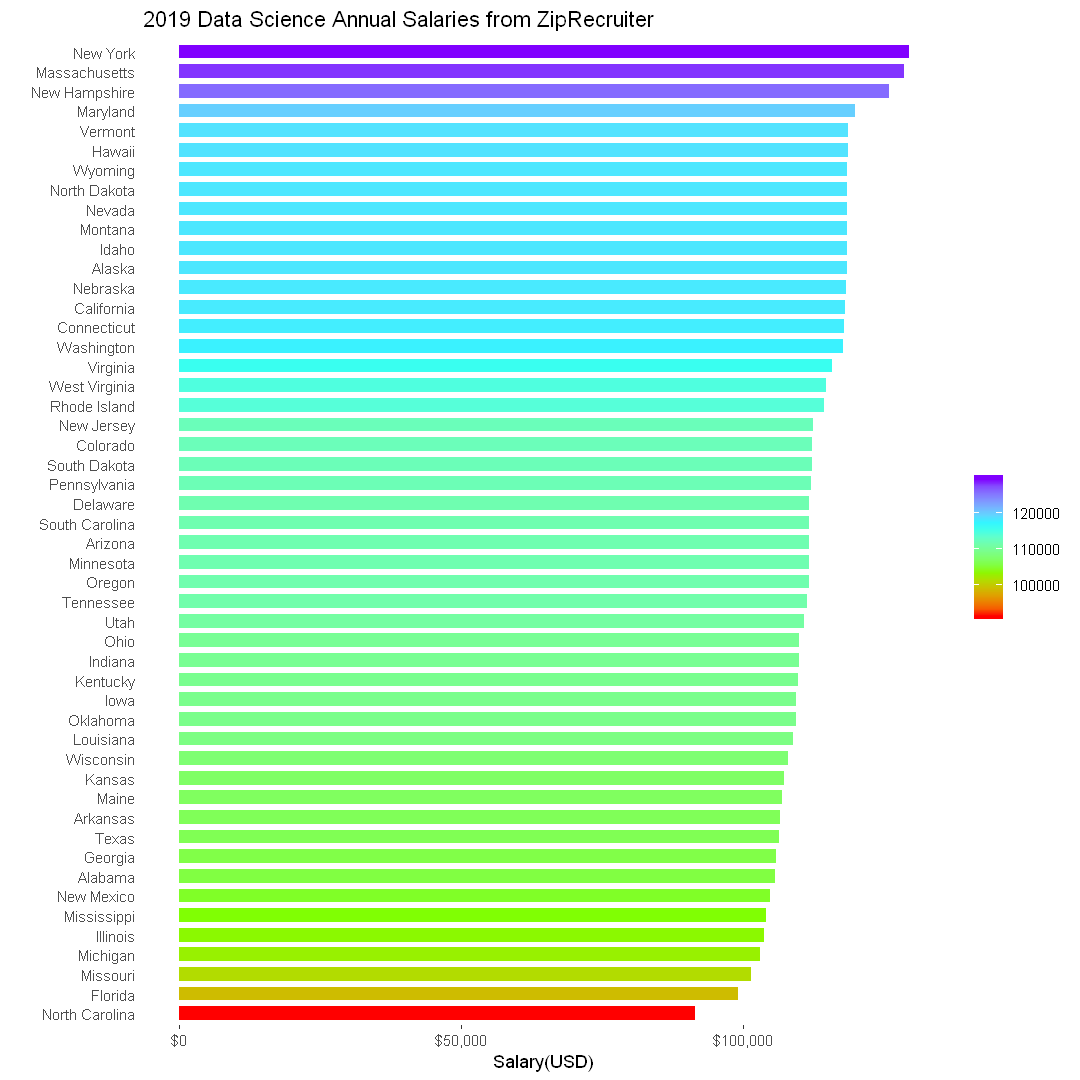

In [390]:
# change options for this visualization
options(repr.plot.width = 9, repr.plot.height = 9)


# perform the visualization
p_dssal = ggplot(dssaldf, aes(y = DSSalary, fill=DSSalary, x = reorder(StateName, DSSalary)))

p_dssal = p_dssal + geom_bar(stat="identity", position = position_dodge(width = 0.4), width=0.7) + 
               scale_fill_gradientn(colours = rainbow(4))

p_dssal = p_dssal + coord_flip() + theme(panel.background = element_rect(fill = 'white'), 
               axis.ticks.y = element_blank())

p_dssal = p_dssal + scale_y_continuous(labels = scales::dollar)

p_dssal = p_dssal + labs(title='2019 Data Science Annual Salaries from ZipRecruiter', 
               x='', y='Salary(USD)', fill = '')

p_dssal




In [391]:
# make a dataframe for the visualization of the states with highest and lowest raw DS income

# subset the data 
hlsaldf = filter(ds_df21, DSSalaryFlag %in% c('TOP15', 'BOTTOM10'))

# order by DSSalaryFlag and DSSalary
hlsaldf = arrange(hlsaldf, desc(DSSalary))
head(hlsaldf)

DSSalary,StateName,StateAbbr,DSJobCount,RPP2017,MHI,MHINewRank,HasDSJobs,RPP2017Percent,AdjDSSalary,...,RankAdjDSSalary,RankMHI,RankAdjMHI,RankRatioSalMHI,StateName2,DSSalaryFlag,MHIFlag,AdjDSSalaryFlag,AdjMHIFlag,RatioSalMHIFlag
<int>,<chr>,<chr>,<int>,<dbl>,<int>,<dbl>,<chr>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
129478,New York,NY,12,115.8,64894,14,YES,1.158,111811.7,...,15,37,10,34,New York,TOP15,TOP15,,BOTTOM10,
128450,Massachusetts,MA,8,107.9,77385,4,YES,1.079,119045.4,...,30,47,49,13,Massachusetts,TOP15,TOP15,,TOP15,
125932,New Hampshire,NH,NA,105.8,73381,6,NO,1.058,119028.4,...,29,45,43,14,New Hampshire,TOP15,TOP15,,TOP15,
119868,Maryland,MD,2,109.4,80776,1,YES,1.094,109568.6,...,10,50,50,2,Maryland,TOP15,TOP15,BOTTOM10,TOP15,BOTTOM10
118625,Vermont,VT,NA,102.5,57513,27,NO,1.025,115731.7,...,25,24,11,38,Vermont,TOP15,,,,TOP15
118565,Hawaii,HI,NA,118.5,77765,3,NO,1.185,100054.9,...,3,48,37,3,Hawaii,TOP15,TOP15,BOTTOM10,TOP15,BOTTOM10


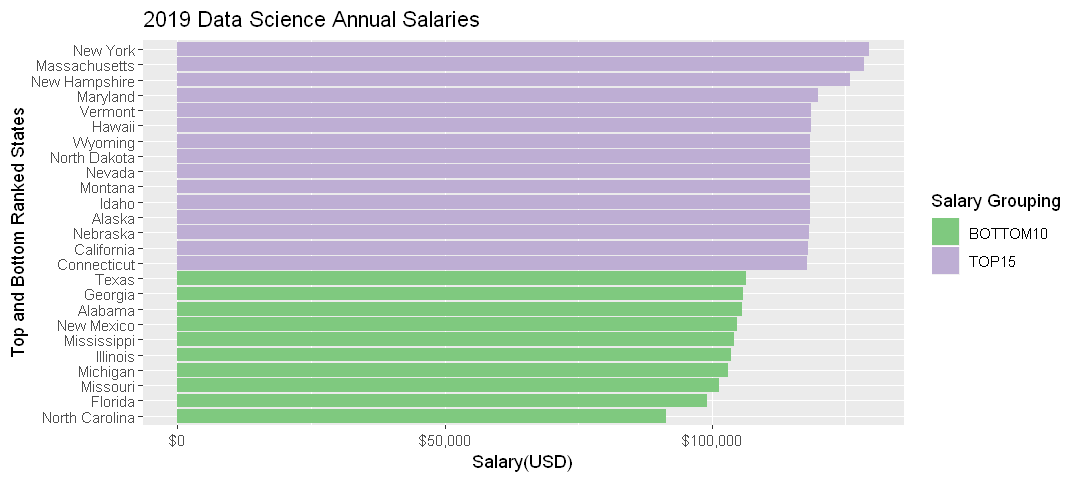

In [392]:
# reset options for this visualization
options(repr.plot.width = 9, repr.plot.height = 4)

# perform the visualization
p = ggplot(hlsaldf, aes(y = DSSalary, x = reorder(StateName, DSSalary), fill=DSSalaryFlag))

p = p + geom_bar(stat="identity")

p = p + coord_flip()


p2 = p

p2 = p2 + scale_y_continuous(labels = scales::dollar)

p2 = p2 + labs(fill = "Salary Grouping", title='2019 Data Science Annual Salaries', 
               x='Top and Bottom Ranked States', y="Salary(USD)")


p2 = p2 + scale_fill_brewer(palette="Accent")


p2

In [393]:
# make a dataframe for the visualization of the states with highest and lowest adjusted DS income

# subset the data 
adjhlsaldf = filter(ds_df21, AdjDSSalaryFlag %in% c('TOP15', 'BOTTOM10'))

# order by DSSalaryFlag and DSSalary
adjhlsaldf = arrange(adjhlsaldf, desc(AdjDSSalary))
head(adjhlsaldf)

DSSalary,StateName,StateAbbr,DSJobCount,RPP2017,MHI,MHINewRank,HasDSJobs,RPP2017Percent,AdjDSSalary,...,RankAdjDSSalary,RankMHI,RankAdjMHI,RankRatioSalMHI,StateName2,DSSalaryFlag,MHIFlag,AdjDSSalaryFlag,AdjMHIFlag,RatioSalMHIFlag
<int>,<chr>,<chr>,<int>,<dbl>,<int>,<dbl>,<chr>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
118175,Nebraska,NE,NA,89.6,59970,21,NO,0.896,131891.7,...,50,30,39,31,Nebraska,TOP15,,TOP15,TOP15,
114703,West Virginia,WV,NA,87.0,43469,50,NO,0.870,131842.5,...,49,1,1,50,West Virginia,,BOTTOM10,TOP15,BOTTOM10,TOP15
118327,North Dakota,ND,NA,90.1,61843,18,NO,0.901,131328.5,...,48,33,41,29,North Dakota,TOP15,,TOP15,TOP15,
118327,Idaho,ID,NA,93.0,52225,40,NO,0.930,127233.3,...,47,11,12,45,Idaho,TOP15,,TOP15,,TOP15
112167,South Dakota,SD,NA,88.2,56521,29,NO,0.882,127173.5,...,46,22,33,33,South Dakota,,,TOP15,,
118327,Montana,MT,NA,94.6,53386,37,NO,0.946,125081.4,...,45,14,14,43,Montana,TOP15,,TOP15,,TOP15


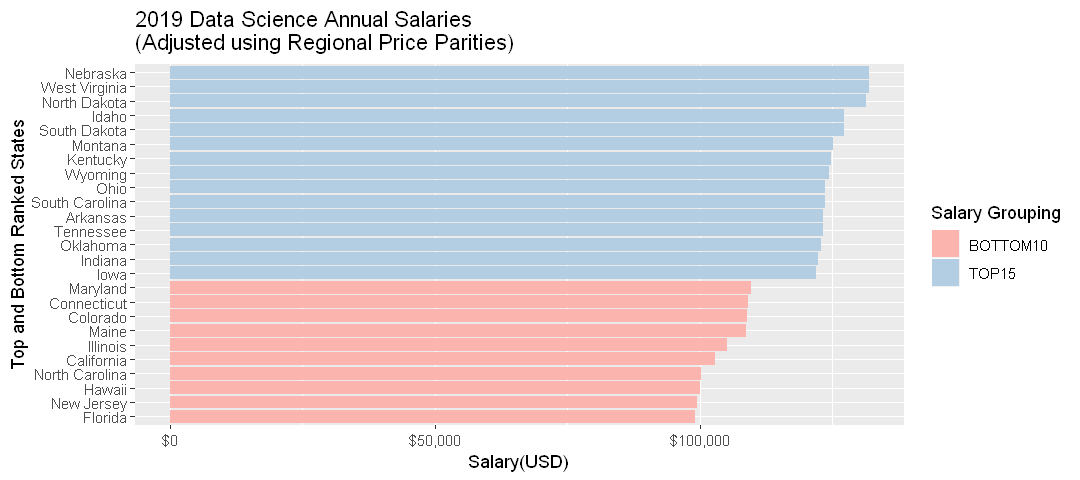

In [394]:
# perform the visualization
p3 = ggplot(adjhlsaldf, aes(y = AdjDSSalary, x = reorder(StateName, AdjDSSalary), fill=AdjDSSalaryFlag))

p3 = p3 + geom_bar(stat="identity")

p3 = p3 + coord_flip()


p4 = p3

p4 = p4 + scale_y_continuous(labels = scales::dollar)

p4 = p4 + labs(fill = "Salary Grouping", 
               title='2019 Data Science Annual Salaries\n(Adjusted using Regional Price Parities)', 
               x='Top and Bottom Ranked States', y="Salary(USD)")



p4 = p4 + scale_fill_brewer(palette="Pastel1")


p4

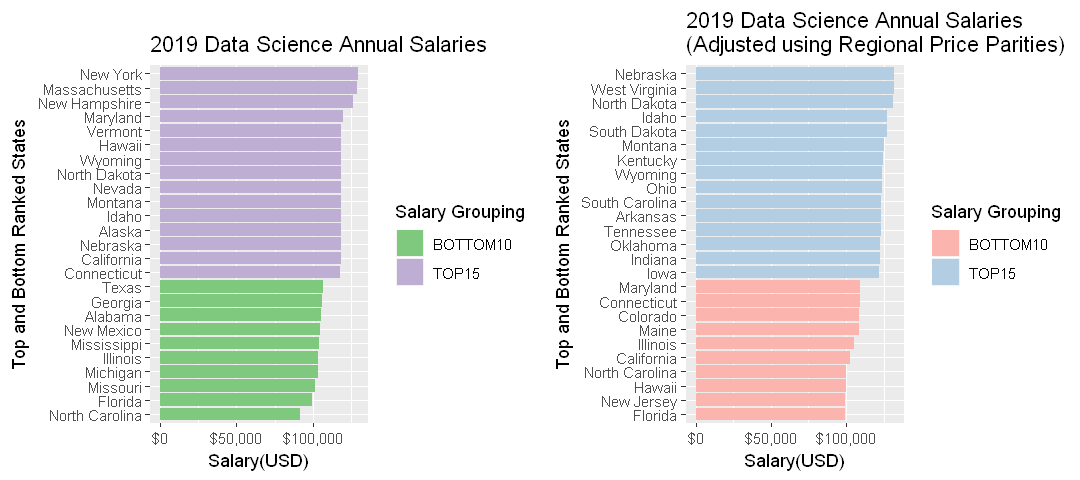

In [395]:
p5 = p2 + p4
p5

In [396]:
# make a dataframe for the visualization of data science salaries in relation to median household income

# keep only the columns needed for the visualization 
scatterdf = select(ds_df21, c(StateName, DSSalary, MHI, DSSalaryFlag))



# order by DSSalary
scatterdf = arrange(scatterdf, desc(DSSalary))
head(scatterdf)

StateName,DSSalary,MHI,DSSalaryFlag
<chr>,<int>,<int>,<chr>
New York,129478,64894,TOP15
Massachusetts,128450,77385,TOP15
New Hampshire,125932,73381,TOP15
Maryland,119868,80776,TOP15
Vermont,118625,57513,TOP15
Hawaii,118565,77765,TOP15


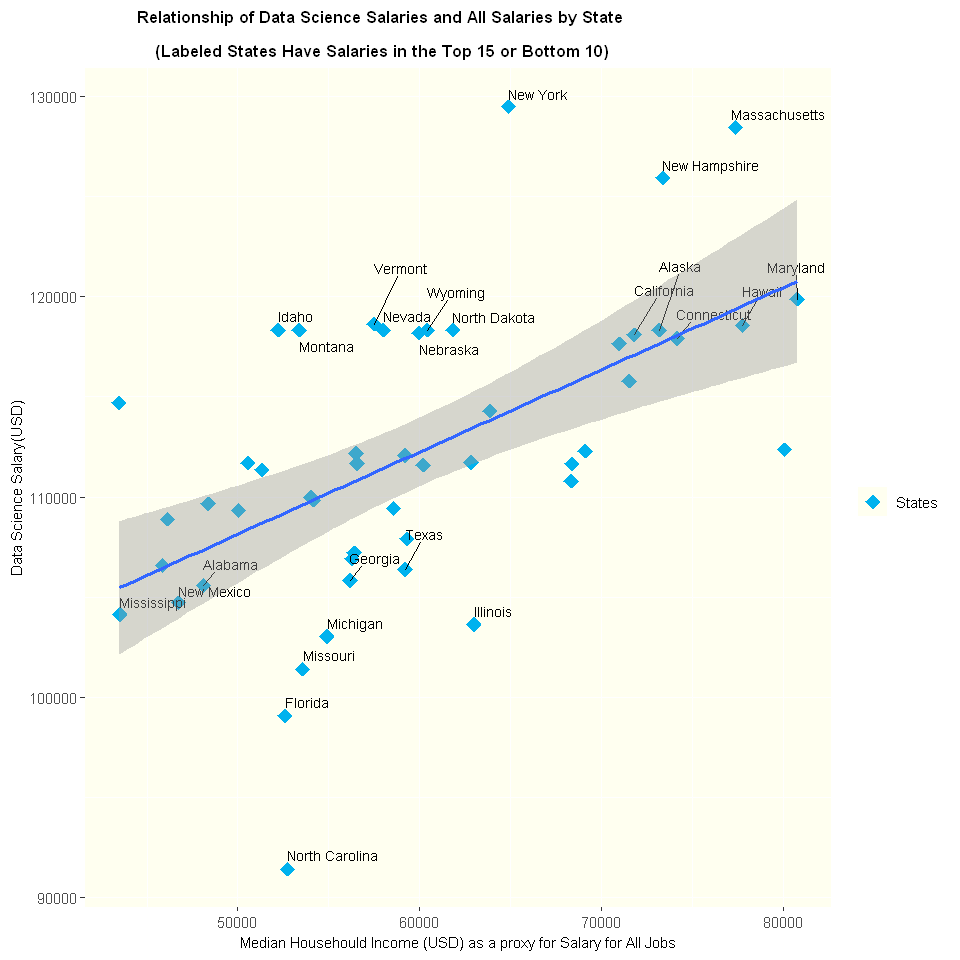

In [397]:
# change options for this visualization
options(repr.plot.width = 8, repr.plot.height = 8)


# perform the visualization
# uses a dummy variable (text string States) so that ggplot will add a legend for the points 
p10 = ggplot(scatterdf, aes(y = DSSalary, x = MHI, label=StateName))

p10 = p10 + geom_point(size=4, shape=18, aes(color='States')) + 
        scale_colour_manual(name='', values=('States'='deepskyblue2'), guide='legend')

p10 = p10 + theme(panel.background = element_rect(fill = 'ivory'), 
        legend.key = element_rect(fill = "ivory", color = NA),     
        plot.title = element_text(size=10, hjust=0.2, face="bold", lineheight=0.85),
        axis.title=element_text(size=9)) 




p10 = p10 + ggtitle('Relationship of Data Science Salaries and All Salaries by State
        \n   (Labeled States Have Salaries in the Top 15 or Bottom 10)')

p10 = p10 + labs(x='Median Househould Income (USD) as a proxy for Salary for All Jobs',
        y='Data Science Salary(USD)')



p10 = p10 + geom_text_repel(data=subset(scatterdf, DSSalaryFlag == "TOP15"),
        nudge_x=7.5, nudge_y=3, segment.size  = 0.5, segment.color = "black",
        direction="y",  hjust=0, size=3) + 
        geom_text_repel(data=subset(scatterdf, DSSalaryFlag == "BOTTOM10"),
        nudge_x=7.5, nudge_y=3, segment.size  = 0.5, segment.color = "black",
        direction="y", hjust= 0, size=3)


p10 = p10 + geom_smooth(method = lm)



p10

In [398]:
# make a dataframe for the visualization of the ratio of data science salaries to median household income

# keep only the columns needed for the visualization 
ratiodf = select(ds_df21, c(StateName, DSSalary, MHI, RankRatioSalMHI, RatioSalMHIFlag, 
                            AdjDSSalaryFlag, RatioSalMHI, AdjDSSalary))



# adjust the column for AdjDSSalaryFlag to add a value for NA or blank
ratiodf = mutate(ratiodf, AdjDSSalaryFlag=ifelse(AdjDSSalaryFlag %in% c('TOP15', 'BOTTOM10'), 
        AdjDSSalaryFlag, 'MIDDLE'))


# order by RankRatioSalMHI
ratiodf = arrange(ratiodf, desc(AdjDSSalary))
head(ratiodf)

StateName,DSSalary,MHI,RankRatioSalMHI,RatioSalMHIFlag,AdjDSSalaryFlag,RatioSalMHI,AdjDSSalary
<chr>,<int>,<int>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
Nebraska,118175,59970,31,,TOP15,1.970569,131891.7
West Virginia,114703,43469,50,TOP15,TOP15,2.638731,131842.5
North Dakota,118327,61843,29,,TOP15,1.913345,131328.5
Idaho,118327,52225,45,TOP15,TOP15,2.265716,127233.3
South Dakota,112167,56521,33,,TOP15,1.984519,127173.5
Montana,118327,53386,43,TOP15,TOP15,2.216443,125081.4


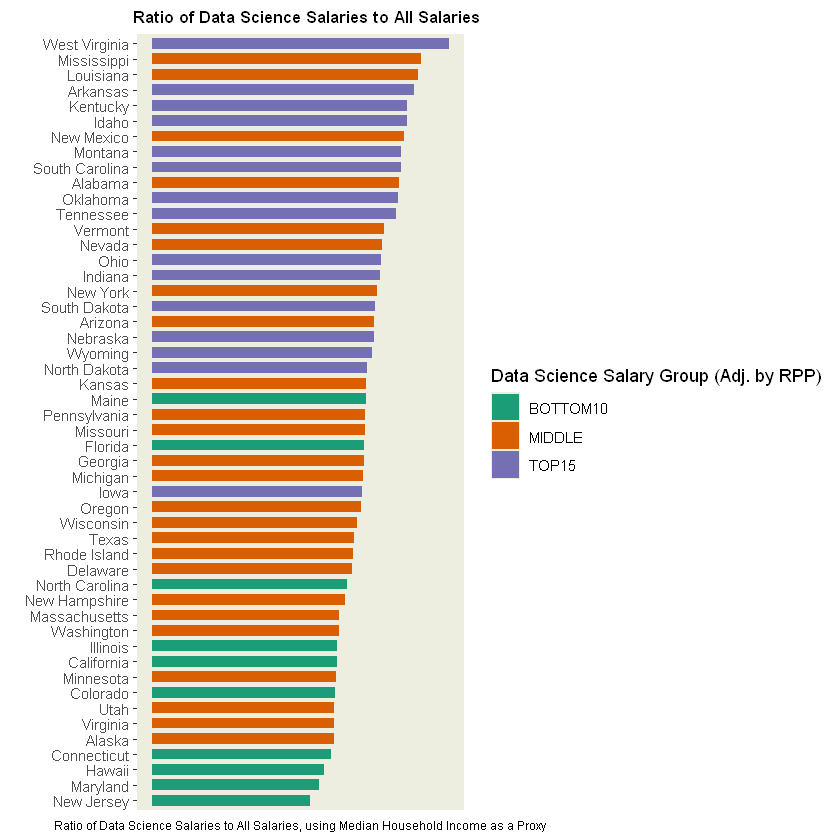

In [399]:
# reset options for this visualization
options(repr.plot.width = 7, repr.plot.height = 7)

# perform the visualization
p20 = ggplot(ratiodf, aes(y = RatioSalMHI, x = reorder(StateName, RatioSalMHI), fill=AdjDSSalaryFlag))

p20 = p20 + geom_bar(stat="identity", position = position_dodge(width = 0.4), width=0.7)

p20 = p20 + coord_flip()


p20 = p20 + scale_y_continuous(labels = scales::dollar)

p20 = p20 + labs(fill = "Data Science Salary Group (Adj. by RPP)", title='Ratio of Data Science Salaries to All Salaries', 
               x='', y="Ratio of Data Science Salaries to All Salaries, using Median Household Income as a Proxy")



p20 = p20 + theme(panel.background = element_rect(fill = 'ivory2'), 
        legend.key = element_rect(fill = "ivory2", color = NA),     
        plot.title = element_text(size=10, hjust=0.2, face="bold", lineheight=0.85),
        panel.grid.minor = element_blank(), panel.grid.major = element_blank(),
        axis.title=element_text(size=7),
        axis.ticks.x = element_blank(),axis.text.x = element_blank()) 


p20 = p20 + scale_fill_brewer(palette="Dark2")



p20

In [400]:
# make a dataframe for the visualization of the number of data science jobs by state

# keep only the columns needed for the visualization 
jobcountsdf = select(ds_df21, c(StateName, DSJobCount))



# adjust the column for DSJobCount to replace NA or blank with small value for visualization
jobcountsdf = mutate(jobcountsdf, DSJobCount=ifelse(is.na(DSJobCount), 0.02, DSJobCount))


# order by RankRatioSalMHI
jobcountsdf = arrange(jobcountsdf, desc(DSJobCount))
head(jobcountsdf)

StateName,DSJobCount
<chr>,<dbl>
California,38
New York,12
Massachusetts,8
Illinois,6
Pennsylvania,5
Texas,5


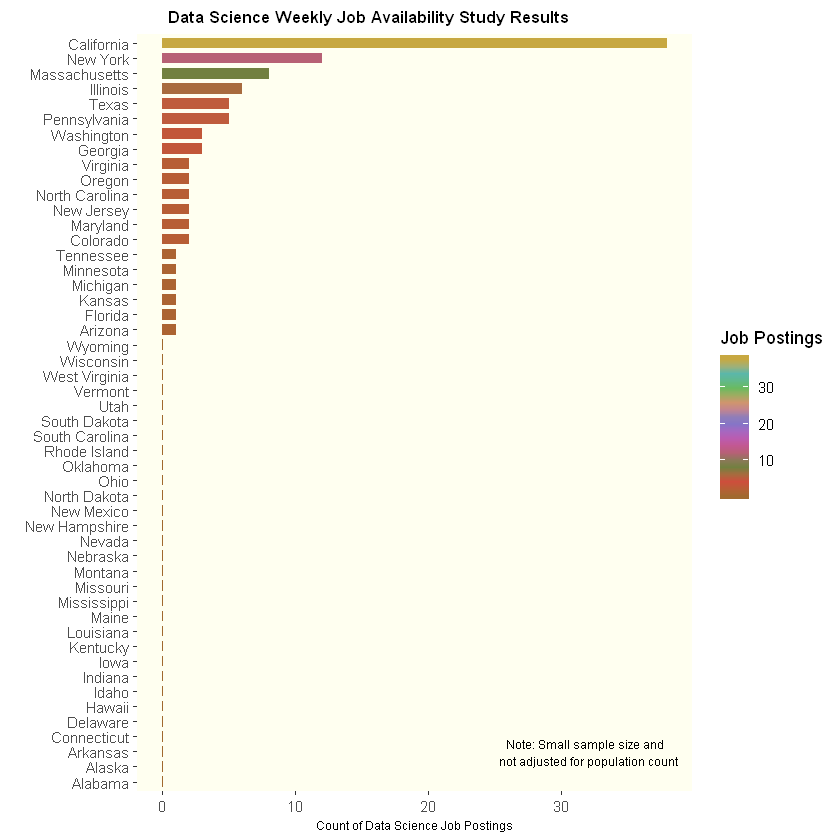

In [401]:
# reset options for this visualization
options(repr.plot.width = 7, repr.plot.height = 7)

# perform the visualization
p30 = ggplot(jobcountsdf, aes(y = DSJobCount, fill = DSJobCount, x = reorder(StateName, DSJobCount)))

p30 = p30 + geom_bar(stat="identity", position = position_dodge(width = 0.4), width=0.7) +
        scale_fill_gradientn(colours = c("#a1692e","#d04c3d","#638441","#c5557f","#b65ebd","#6f7bca",
        "#de8b72","#6bba56","#4eb8b0","#c7a841"))

p30 = p30 + coord_flip()


p30 = p30 + labs(title='Data Science Weekly Job Availability Study Results', 
               x='', y="Count of Data Science Job Postings", fill='Job Postings')

p30 = p30 + theme(panel.background = element_rect(fill = 'ivory'), 
        legend.key = element_rect(fill = "ivory", color = NA),     
        plot.title = element_text(size=10, hjust=0.2, face="bold", lineheight=0.85),
        panel.grid.minor = element_blank(), panel.grid.major = element_blank(),
        axis.title=element_text(size=7)) 


p30 = p30 + annotate("text", x = 3, y = 32, size=2.5,
        label = "Note: Small sample size and \n not adjusted for population count")




p30

In [402]:
# make a dataframe for the visualization of data science salaries in states with data science job availability

# keep only the columns needed for the visualization 
jobstatesdf = select(ds_df21, c(StateName, DSJobCount, HasDSJobs, DSSalary, AdjDSSalary,
        DSSalaryFlag, AdjDSSalaryFlag, RankAdjDSSalary, RankDSSalary))


# subset the data to keep only the states where there were 1 or more jobs
jobstatesdf = filter(jobstatesdf, HasDSJobs =='YES')


# adjust flag columns that have only levels for top15 and bottom10 to add a level for middle
jobstatesdf = mutate(jobstatesdf, DSSalaryFlag=ifelse(DSSalaryFlag %in% c('TOP15', 'BOTTOM10'), 
        DSSalaryFlag, 'MIDDLE'))
jobstatesdf = mutate(jobstatesdf, AdjDSSalaryFlag=ifelse(AdjDSSalaryFlag %in% c('TOP15', 'BOTTOM10'), 
        AdjDSSalaryFlag, 'MIDDLE'))


# order by RankRatioSalMHI
jobstatesdf = arrange(jobstatesdf, desc(StateName))
head(jobstatesdf)




StateName,DSJobCount,HasDSJobs,DSSalary,AdjDSSalary,DSSalaryFlag,AdjDSSalaryFlag,RankAdjDSSalary,RankDSSalary
<chr>,<int>,<chr>,<int>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
Washington,3,YES,117644,110567.7,MIDDLE,MIDDLE,12,35
Virginia,2,YES,115784,113402.5,MIDDLE,MIDDLE,20,34
Texas,5,YES,106380,109670.1,BOTTOM10,MIDDLE,11,10
Tennessee,1,YES,111356,123181.4,MIDDLE,TOP15,39,22
Pennsylvania,5,YES,112076,114480.1,MIDDLE,MIDDLE,23,28
Oregon,2,YES,111586,112146.7,MIDDLE,MIDDLE,16,23


In [403]:
# reshape from wide to long
jobstatesdflong = jobstatesdf %>% gather("DSSalary", "AdjDSSalary", key=SalaryType, value=AnnualSal) 

# adjust the column for SalaryType to improve values of DSSalary and AdjDSSalary
jobstatesdflong = mutate(jobstatesdflong, 
        SalaryType=ifelse(SalaryType=='DSSalary', 'Raw Salary', 'RPP Adjusted Salary'))


# order by RankAdjDSSalary
jobstatesdflong = arrange(jobstatesdflong, desc(RankAdjDSSalary))
head(jobstatesdflong)



StateName,DSJobCount,HasDSJobs,DSSalaryFlag,AdjDSSalaryFlag,RankAdjDSSalary,RankDSSalary,SalaryType,AnnualSal
<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>
Tennessee,1,YES,MIDDLE,TOP15,39,22,Raw Salary,111356.0
Tennessee,1,YES,MIDDLE,TOP15,39,22,RPP Adjusted Salary,123181.4
Kansas,1,YES,MIDDLE,MIDDLE,31,13,Raw Salary,107212.0
Kansas,1,YES,MIDDLE,MIDDLE,31,13,RPP Adjusted Salary,119124.4
Massachusetts,8,YES,TOP15,MIDDLE,30,49,Raw Salary,128450.0
Massachusetts,8,YES,TOP15,MIDDLE,30,49,RPP Adjusted Salary,119045.4


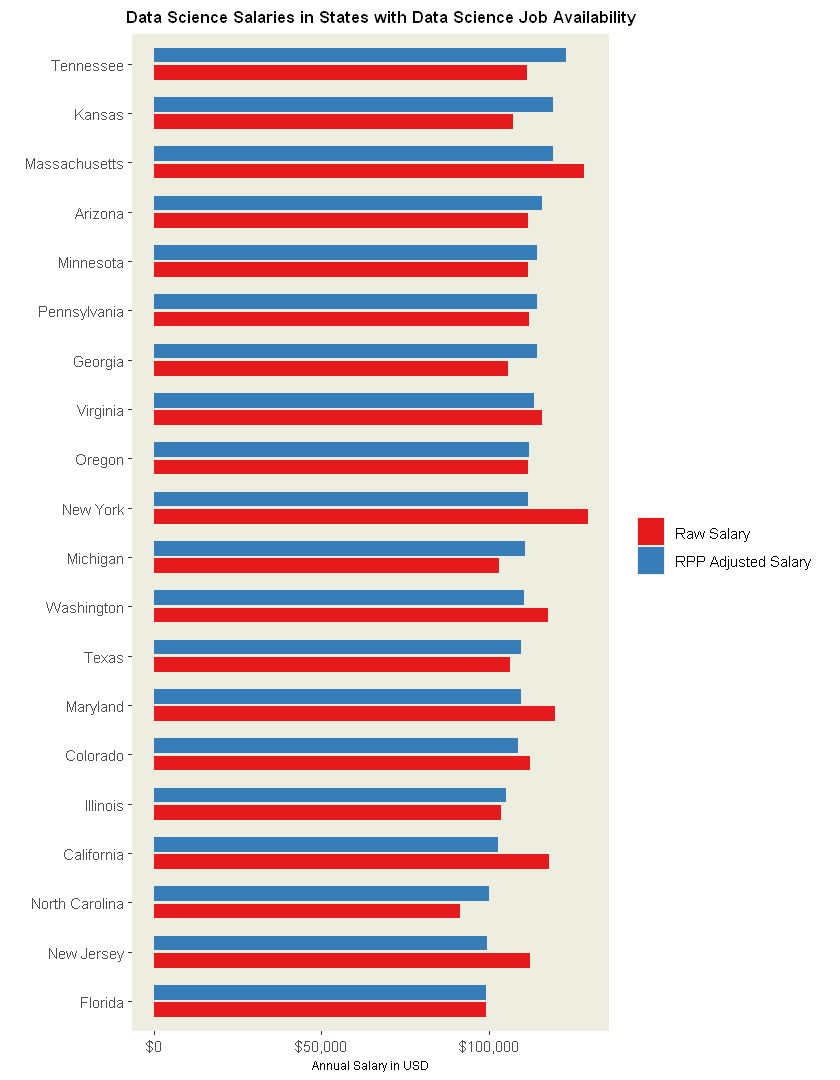

In [404]:
# reset options for this visualization
options(repr.plot.width = 7, repr.plot.height = 9)

# perform the visualization
p50 = ggplot(jobstatesdflong, aes(y = AnnualSal, x = reorder(StateName, RankAdjDSSalary), fill=SalaryType))

p50 = p50 + geom_bar(stat="identity", position = position_dodge(width = 0.7), width=0.6)

p50 = p50 + coord_flip()


p50 = p50 + scale_y_continuous(labels = scales::dollar)

p50 = p50 + labs(fill = "", 
        title='Data Science Salaries in States with Data Science Job Availability', 
        x='', y="Annual Salary in USD")



p50 = p50 + theme(panel.background = element_rect(fill = 'ivory2'), 
        legend.key = element_rect(fill = "ivory2", color = NA),     
        plot.title = element_text(size=10, hjust=0.2, face="bold", lineheight=0.85),
        panel.grid.minor = element_blank(), panel.grid.major = element_blank(),
        axis.title=element_text(size=7)) 


p50 = p50 + scale_fill_brewer(palette="Set1")



p50